<a href="https://colab.research.google.com/github/HuberM1998/UFPel/blob/master/C%C3%B3pia_de_Relatorio3_Mathaus_Huber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def formaNewton(m, x, y, z):
  r = 0
  dely = np.zeros(m)
  for i in range(0, m):
    dely[i] = y[i]
  
  for k in range(1, m):
    for i in range(m, k, -1):
      dely[i-1] = (dely[i-1] - dely[i-2]) / (x[i-1] - x[i-k-1])
  
  r = dely[m-1]

  for i in range(m-1, 0, -1): 
    r = r * (z - x[i-1]) + dely[i-1]
  
  print("Estimativa com polinômio de grau ", m-1)
  print("O valor de z interpolado é ", r)

In [ ]:
x = [1.6,2,2.5,3.2,4,4.5]
y = [2.,8,14,15,8,2]
z = 2.8
for i in range(2,7):
  formaNewton(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
O valor de z interpolado é  20.0
------------------------------------
Estimativa com polinômio de grau  2
O valor de z interpolado é  16.799999999999997
------------------------------------
Estimativa com polinômio de grau  3
O valor de z interpolado é  15.814285714285715
------------------------------------
Estimativa com polinômio de grau  4
O valor de z interpolado é  15.601428571428572
------------------------------------
Estimativa com polinômio de grau  5
O valor de z interpolado é  15.534914285714287
------------------------------------


Foi implementado o algoritmo da forma de Newton através do pseudo-código "Algoritmo Forma de Newton - Filho" sendo a forma de Newton uma fórmula alternativa para o cálculo do polinômio interpolador, baseada numa construção sucessiva a partir dos polinomios de graus inferiores. Para estabelecer essa fórmula convém introduzir a noção de diferença dividida. 

As diferenças divididas são razões incrementais e constituem aproximações discretas de derivadas, desde que se utilizem pontos suficientemente próximos. No caso que nos interessa, iremos utilizar os nós de interpolação que podem estar bastante afastados. Para funções regulares é possível estabelecer uma relação entre o valor de uma diferença dividida e a derivada num certo ponto.

In [ ]:
def formaLagrange(m, x, y, z):
  r = 0
  for i in range(0, m):
    c = 1
    d = 1

    for j in range(0, m):
      if i != j:
        c = c * (z - x[j])
        d = d * (x[i] - x[j])
    r = r + y[i] * c / d
    
  print("Estimativa com polinômio de grau ", m-1)
  print("O valor de z interpolado é ", r)

In [ ]:
x = [1.6,2,2.5,3.2,4,4.5]
y = [2.,8,14,15,8,2]
z = 2.8
for i in range(2,7):
  formaLagrange(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
O valor de z interpolado é  20.0
------------------------------------
Estimativa com polinômio de grau  2
O valor de z interpolado é  16.799999999999997
------------------------------------
Estimativa com polinômio de grau  3
O valor de z interpolado é  15.814285714285711
------------------------------------
Estimativa com polinômio de grau  4
O valor de z interpolado é  15.60142857142857
------------------------------------
Estimativa com polinômio de grau  5
O valor de z interpolado é  15.534914285714285
------------------------------------


Foi implementado o algoritmo da forma de Lagrange através do pseudo-código "Algoritmo Forma de Lagrange - Filho" a definição da forma de Lagrange é Seja um conjunto de n+1 pontos{xi,f(xi)}. Ele encontrar um polinômio interpolador pn(x) que satisfaz a equação, isto é, passe por todos os pontos.

As vantagens da forma de lagrange são que a fórmula dela é popular, pois é bem conhecida e é fácil de codificar, o que acontece também com a forma de Newton. Além disso, os dados não são obrigados a ser especificados com x em ordem crescente ou decrescente.

As desvantagens dela são que embora o cálculo de pn(x) é simples, o método ainda não é eficiente para grandes valores de n, e a interpolação polinomial de ordem alta é instável.



In [ ]:
import numpy as np
def solve_spline(x, y):

  n = len(x) 
  assert len(y) == n



  a = y.copy()
  h = np.zeros(n-1)
  for i in range(n-1):
    h[i] = x[i+1] - x[i] 

  
  A = np.zeros( (n,n) )
  B = np.zeros( n )

  for i in range(1,n-1):
    A[i][i-1] = h[i-1]
    A[i][i]   = 2*( h[i-1] + h[i] )
    A[i][i+1] = h[i]
  
    B[i] = 3.0*(a[i+1] - a[i])/float(h[i]) - 3.0*(a[i] - a[i-1])/float(h[i-1])

  A[0][0]   = 1.0
  A[-1][-1] = 1.0


  c = np.linalg.solve( A, B )
  b = np.zeros(n-1)
  d = np.zeros(n-1)
  for i in range(n-1):
    b[i] = (a[i+1]-a[i])/float(h[i]) - h[i]*( 2*c[i] + c[i+1] )/3.0
    d[i] = (c[i+1]-c[i])/( 3.0 * h[i] )

  coef = np.zeros( (n-1,4) )
  for i in range(n-1):
    coef[i][0] = a[i]
    coef[i][1] = b[i]
    coef[i][2] = c[i]
    coef[i][3] = d[i]


  return coef

def calc_spline( x, X, coef ):
  
  y = 0
  x = np.array(x)
  try:
    n = len(X)
    
    y = np.zeros(n)
    for i in range(n):
      y[i] = calc_spline( x, X[i], coef )
  
  except:
    
    # Encontra a posição de X dentro do vetor x
    k = x.searchsorted( X )
  
    if k>0      : k -= 1  # Use a função S do ponto da esquerda
    if k==len(x): k -= 1  # X[i] > x[n]
    
    H = X - x[k]
    ak = coef[k][0]
    bk = coef[k][1]
    ck = coef[k][2]
    dk = coef[k][3]
    y = ak + H*( bk + H*( ck + H*dk ) )
  
  
  return y


In [ ]:
x = [1.5,2.0,2.2,3.0,3.8]
y = [4.9,3.3,3.0,2.0,1.7]

coef = solve_spline(x,y)
calc_spline(x, 1.75 , coef)

3.984560861895161

Criei uma função que resolve a spline e retorna os seus coeficientes, e uma que calcula a spline com base no valor a ser interpolado sendo uma entrada para o usuário, e os paramêtros sendo o vetor x inicial, e o vetor de coeficientes encontrados na função anterior.
Dentro da função que calcula a spline eu fiz uma tratagem de erro, onde o usuário pode entrar com um valor a ser interpolado ou uma lista de valores.

A   origem   do   nome   spline   vem   de   uma   régua   elástica,   usada   em   desenhos   de engenharia,  que  pode  ser  curvada  de  forma  a  passar  por  um  dado  conjunto  de  pontos  (xi, yi),  que  tem  o  nome  de  spline.  Sob  certas  hipóteses  (de  acordo  com  a  teoria  da  elasticidade)  a  curva  definida  pela  régua  pode  ser  descrita  aproximadamente  como  sendo  uma  função  por  partes,  cada  qual  um  polinômio  cúbico,  de  tal  forma  que  ela  e  suas  duas  primeiras  derivadas  são  contínuas  sempre.  A  terceira  derivada,  entretanto,  pode  ter  descontinuidades  nos  pontos  xi.  Tal  função  é  uma  spline  cúbica  interpolante  com  nós  nos  pontos  xi.

Quando temos polinômios de graus muito altos, a função tende a oscilar bastante e quebra todo o padrão, então é difícil chegar numa resposta com um erro pequena usando apenas um polinômio interpolador e o resultado pode ser uma catástrofe. Por isso a função spline é muito interessante, pois é uma solução para esse tipo de problema, onde podemos separar a função em vários intervalors e interpolar cada um desses intervalos com polinômios de graus menores que não correm o risco de se descontrolarem.

Na nossa função spline a função escolhida f(x) deve estar tabelada em n+1 pontos, o que vamos fazer é ao invés de encontrar um polinômio de grau n que passe por todos os pontos tabelados, nós iremos interpolar vários grupinhos de pontos e garantir condições pra que a nossa aproximação seja contínua e tenha derivadas contínuas até a ordem que quisermos.

In [ ]:
def MMQ(n, x, y):
  sumx = 0
  sumxy = 0
  st = 0
  sumy = 0
  sumx2 = 0
  sr = 0

  for i in range(0, n):
    sumx = sumx + x[i]
    sumy = sumy + y[i]
    sumxy = sumxy + x[i] * y[i] 
    sumx2 = sumx2 + x[i] * x[i] 
  
  xm = sumx/n
  ym = sumy/n
  al = (n*sumxy - sumx*sumy) / (n*sumx2 - sumx*sumx)
  a0 = ym - al*xm

  for i in range(0, n):
    st = st + (y[i] - ym)**2
    sr = sr + (y[i] - al*x[i] - a0)**2
  
  syx = (sr / (n-2))**0.5
  r2 = (st - sr) / st

  a = al
  b = a0
  print("a =", a)
  print("b =", b)



In [ ]:
MMQ(4,[1.,2,3,4],[3.,5,6,8])

a = 1.6
b = 1.5


 O Método dos Mínimos Quadrados (MMQ) procura encontrar o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados. Foi utilizado o pseudo-código do "Algoritmo Aproximação Linear - Chapra", onde foi feito alguns ajustes para resolver alguns bugs que estavam acontecendo

# Questão 1

A tabela seguinte apresenta a velocidade de queda de um paraquedista em função do tempo.

Estime  o  valor  da  velocidade  no  instante  de  tempo  10 segundos,  utilizando  um polinômio interpolador de grau 3. Justifique sua resposta

In [ ]:
import numpy as np

def formaNewton(m, x, y, z):
  r = 0
  dely = np.zeros(m)
  for i in range(0, m):
    dely[i] = y[i]
  
  for k in range(1, m):
    for i in range(m, k, -1):
      dely[i-1] = (dely[i-1] - dely[i-2]) / (x[i-1] - x[i-k-1])
  3
  r = dely[m-1]

  for i in range(m-1, 0, -1): 
    r = r * (z - x[i-1]) + dely[i-1]

  print("Estimativa com polinômio de grau ", m-1)
  print("A velocidade no instante de tempo de %.1f segundos é %f cm/s " %(z,r))


In [ ]:
x = [3,5.0,7,20]
y = [2310.0,3090.0,3940.0,8000.0]
z = 10
for i in range(2,5):
  formaNewton(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
A velocidade no instante de tempo de 10.0 segundos é 5040.000000 cm/s 
------------------------------------
Estimativa com polinômio de grau  2
A velocidade no instante de tempo de 10.0 segundos é 5346.250000 cm/s 
------------------------------------
Estimativa com polinômio de grau  3
A velocidade no instante de tempo de 10.0 segundos é 5245.803167 cm/s 
------------------------------------


In [ ]:
def formaLagrange(m, x, y, z):
  r = 0
  for i in range(0, m):
    c = 1
    d = 1

    for j in range(0, m):
      if i != j:
        c = c * (z - x[j])
        d = d * (x[i] - x[j])
    r = r + y[i] * c / d
    
  print("Estimativa com polinômio de grau ", m-1)
  print("A velocidade no instante de tempo de %.1f segundos é %f cm/s " %(z,r))

In [ ]:
x = [3,5.0,7,20]
y = [2310.0,3090.0,3940.0,8000.0]
z = 10
for i in range(2,5):
  formaLagrange(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
A velocidade no instante de tempo de 10.0 segundos é 5040.000000 cm/s 
------------------------------------
Estimativa com polinômio de grau  2
A velocidade no instante de tempo de 10.0 segundos é 5346.250000 cm/s 
------------------------------------
Estimativa com polinômio de grau  3
A velocidade no instante de tempo de 10.0 segundos é 5245.803167 cm/s 
------------------------------------


Eu utilizei os dois algoritmos para a resolução do mesmo exercício, de forma a mostrar que chegamos no mesmo resultado por diferentes maneiras de abordagem, no quesito de esforço computacional, percebe-se que o método de Lagrange possui operações mais requisitadas na  interpolação.  Isso  influencia  diretamente  o  número  total  de  operações  feitas para  determinar  a  mesma  interpolação,  tornando  o  método  de  Lagrange  mais “pesado” em termos  de  esforço  computacional. Dessa  forma,  entre  as  duas  formas  de  se  determinar  o polinômio interpolador abordadas, à interpolação de Newton requer um esforço computacional menor e, portanto, é mais eficaz.

Na questão 1 em específico, os valores escolhidos para se fazer a interpolação, neste caso, são os 4 últimos, pois para termos uma estimativa com o polinômio de grau m necessitamos de m+1 valores.

Na hora de printar o resultado, eu achei interessante usar um laço for para mostrar como ficariam as estimativas com polinômios de grau n, no caso do exercício, o grau requerido para o polinômio interpolador é 3, sendo a velocidade no instante de tempo de 10.0 segundos = 5245.803167 cm/s. Eu poderia por um condicional, onde poderia printar somente quando o contador "i" fosse igual a 4, ou seja, o grau 3+1, que é onde se encontra a estimativa para o polinômio de grau 3, ou simplesmente tirar o laço, como estamos utilizando 4 pontos com a intenção de encontrar o polinômio interpolador de grau 3, o algoritmo já nos mostraria a estimativa sem a necessidade de mostrar o resultado com os graus 1 e 2, porém, eu achei mais interessante assim... :)

# Questão 2

A tabela seguinte apresenta a produção de milho em 6 propriedades agrícolas. A variável x é a área medida em hectare e f(x) é a produção medida em sacas.

Estime  o  valor  da  produção  em  12,  22  e  31  hectares,  utilizando  um  polinômio interpolador de grau 4. Justifique sua resposta

In [ ]:
import numpy as np

def formaNewton(m, x, y, z):
  r = 0
  dely = np.zeros(m)
  for i in range(0, m):
    dely[i] = y[i]
  
  for k in range(1, m):
    for i in range(m, k, -1):
      dely[i-1] = (dely[i-1] - dely[i-2]) / (x[i-1] - x[i-k-1])
  
  r = dely[m-1]

  for i in range(m-1, 0, -1): 
    r = r * (z - x[i-1]) + dely[i-1]

  print("Estimativa com polinômio de grau ", m-1)
  print("O valor estimado da produção em %.1f hectares é %f sacas" %(z,r))

In [ ]:
x = [15.0,20,25,30,35]
y = [172.0,253,352,473,619]

for i in range(2,6):
  formaNewton(i, x[0:i], y[0:i], 22)
  print("------------------------------------")

print("\n")

x = [20,25,30,35,40]
y = [253,352,473,619,793]
for i in range(2,6):
  formaNewton(i, x[0:i], y[0:i], 31)
  print("------------------------------------")


Estimativa com polinômio de grau  1
O valor estimado da produção em 22.0 hectares é 285.400000 sacas
------------------------------------
Estimativa com polinômio de grau  2
O valor estimado da produção em 22.0 hectares é 290.440000 sacas
------------------------------------
Estimativa com polinômio de grau  3
O valor estimado da produção em 22.0 hectares é 290.216000 sacas
------------------------------------
Estimativa com polinômio de grau  4
O valor estimado da produção em 22.0 hectares é 290.193600 sacas
------------------------------------


Estimativa com polinômio de grau  1
O valor estimado da produção em 31.0 hectares é 470.800000 sacas
------------------------------------
Estimativa com polinômio de grau  2
O valor estimado da produção em 31.0 hectares é 499.840000 sacas
------------------------------------
Estimativa com polinômio de grau  3
O valor estimado da produção em 31.0 hectares é 500.104000 sacas
------------------------------------
Estimativa com polinômio de grau

In [ ]:
def formaLagrange(m, x, y, z):
  r = 0
  for i in range(0, m):
    c = 1
    d = 1

    for j in range(0, m):
      if i != j:
        c = c * (z - x[j])
        d = d * (x[i] - x[j])
    r = r + y[i] * c / d
    
  print("Estimativa com polinômio de grau ", m-1)
  print("O valor estimado da produção em %.1f hectares é %f sacas" %(z,r))

In [ ]:
x = [15.0,20,25,30,35]
y = [172.0,253,352,473,619]

for i in range(2,6):
  formaLagrange(i, x[0:i], y[0:i], 22)
  print("------------------------------------")

print("\n")

x = [20,25,30,35,40]
y = [253,352,473,619,793]
for i in range(2,6):
  formaLagrange(i, x[0:i], y[0:i], 31)
  print("------------------------------------")

Estimativa com polinômio de grau  1
O valor estimado da produção em 22.0 hectares é 285.400000 sacas
------------------------------------
Estimativa com polinômio de grau  2
O valor estimado da produção em 22.0 hectares é 290.440000 sacas
------------------------------------
Estimativa com polinômio de grau  3
O valor estimado da produção em 22.0 hectares é 290.216000 sacas
------------------------------------
Estimativa com polinômio de grau  4
O valor estimado da produção em 22.0 hectares é 290.193600 sacas
------------------------------------


Estimativa com polinômio de grau  1
O valor estimado da produção em 31.0 hectares é 470.800000 sacas
------------------------------------
Estimativa com polinômio de grau  2
O valor estimado da produção em 31.0 hectares é 499.840000 sacas
------------------------------------
Estimativa com polinômio de grau  3
O valor estimado da produção em 31.0 hectares é 500.104000 sacas
------------------------------------
Estimativa com polinômio de grau

Na questão 2 também foram utilizados ambos os métodos, de Lagrange e Newton, onde não foi estimado o primeiro valor em produção para 12 hectares, sendo que esse valor se torna uma extrapolação dentre o número de pontos, logo que ele notavelmente não está entre os pontos a serem interpolados (15, 20, 25, 30, 35, 40).

No segundo valor, para 22 hectares, com uma estimativa com polinômio de grau 4, foram escolhidos os 5 primeiros pontos, ressaltando novamente, que para o grau m precisaríamos de m+1 pontos, por esse motivo a escolha dos pontos mais próximos ao valor requerido, nesse caso os 5 primeiros.

No terceiro valor, para 31 hectares, também com uma estimativa com polinômio de grau 4, foram escolhidos os 5 últimos pontos, logo que, esses seriam os mais próximos nesse caso.

# Questão 3

A resistência de um certo fio de metal, f(x), varia com o diâmetro desse fio, x. Foram medidas as resistência de 5 fios de diversos diâmetros:

Estime  o  valor  da  resistência  de  um  fio  de  1,75  de diâmetro,  utilizando spline  cúbica natural. Justifique sua resposta.

In [ ]:
import numpy as np
def solve_spline(x, y):

  n = len(x) 
  assert len(y) == n



  a = y.copy()
  h = np.zeros(n-1)
  for i in range(n-1):
    h[i] = x[i+1] - x[i] 

  
  A = np.zeros( (n,n) )
  B = np.zeros( n )

  for i in range(1,n-1):
    A[i][i-1] = h[i-1]
    A[i][i]   = 2*( h[i-1] + h[i] )
    A[i][i+1] = h[i]
  
    B[i] = 3.0*(a[i+1] - a[i])/float(h[i]) - 3.0*(a[i] - a[i-1])/float(h[i-1])

  A[0][0]   = 1.0
  A[-1][-1] = 1.0


  c = np.linalg.solve( A, B )
  b = np.zeros(n-1)
  d = np.zeros(n-1)
  for i in range(n-1):
    b[i] = (a[i+1]-a[i])/float(h[i]) - h[i]*( 2*c[i] + c[i+1] )/3.0
    d[i] = (c[i+1]-c[i])/( 3.0 * h[i] )

  coef = np.zeros( (n-1,4) )
  for i in range(n-1):
    coef[i][0] = a[i]
    coef[i][1] = b[i]
    coef[i][2] = c[i]
    coef[i][3] = d[i]


  return coef

def calc_spline( x, X, coef ):
  
  y = 0
  x = np.array(x)
  try:
    n = len(X)
    
    y = np.zeros(n)
    for i in range(n):
      y[i] = calc_spline( x, X[i], coef )
  
  except:
    
    # Encontra a posição de X dentro do vetor x
    k = x.searchsorted( X )
  
    if k>0      : k -= 1  # Use a função S do ponto da esquerda
    if k==len(x): k -= 1  # X[i] > x[n]
    
    H = X - x[k]
    ak = coef[k][0]
    bk = coef[k][1]
    ck = coef[k][2]
    dk = coef[k][3]
    y = ak + H*( bk + H*( ck + H*dk ) )
  
  
  print("A resistência do fio de %.2f de diâmetro é %f" %(X,y))

In [ ]:
x = [1.5,2.0,2.2,3.0,3.8]
y = [4.9,3.3,3.0,2.0,1.7]

coef = solve_spline(x,y)
calc_spline(x, 1.75 , coef)

A resistência do fio de 1.75 de diâmetro é 3.984561


No  caso  das  funções  spline,  a  opção  feita  é  aproximar  a  função  tabelada,  em  cada  subintervalo  [xi,  xi+1],  por  um  polinômio  de  grau  p. No caso da questão 3, foi escolhido os cinco pontos dados, onde calculamos a spline cúbica para um fio de 1.75 de diâmetro, se seguirmos a lógica dos exercícios anteriores, onde usamos somente os pontos mais próximos ao ponto que queremos interpolar, justamente por causa do grau pedido em cada exercício, como exemplo das questões 1 e 2, onde se pede um polinômio interpolador de grau 3 e 4 respectivamente, porém, como não foi especificado dentro do exercício, decidi utilizar todos os pontos, ou seja, todas as resistências dos 5 fios de diversos diâmetros para a interpolação do fio de 1.75.

# Questão 4

Encontre    a    função    f(x)    =    ax + b    que    melhor    se    ajusta    no    sentidode mínimos quadrados aos pontos dados. Então, responda cada item: 

a)Faça um gráfico com os pontos e o esboço da função ajustada. 

b)Encontre o valor de f(1,00).

c)Encontre o valor de f(0,93). 

Forneça os valores calculados com 7 dígitos significativo por arredondamento.

In [ ]:
import matplotlib.pyplot as plt
def MMQ(n, x, y, inicio, fim):
  sumx = 0
  sumxy = 0
  st = 0
  sumy = 0
  sumx2 = 0
  sr = 0

  for i in range(0, n):
    sumx = sumx + x[i]
    sumy = sumy + y[i]
    sumxy = sumxy + x[i] * y[i] 
    sumx2 = sumx2 + x[i] * x[i] 
  
  xm = sumx/n
  ym = sumy/n
  al = (n*sumxy - sumx*sumy) / (n*sumx2 - sumx*sumx)
  a0 = ym - al*xm

  for i in range(0, n):
    st = st + (y[i] - ym)**2
    sr = sr + (y[i] - al*x[i] - a0)**2
  
  syx = (sr / (n-2))**0.5
  r2 = (st - sr) / st

  a = al
  b = a0
  a = round(a,7)
  b = round(b,7)
  print("a =", a)
  print("b =", b)

  f = lambda x_in: a*x_in + b
  curva = np.linspace(inicio, fim, 200)
  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, linestyle='-')
  plt.scatter(x, y)
  plt.xlabel('Eixo x')
  plt.ylabel('Eixo y')
  plt.grid()
  plt.show()

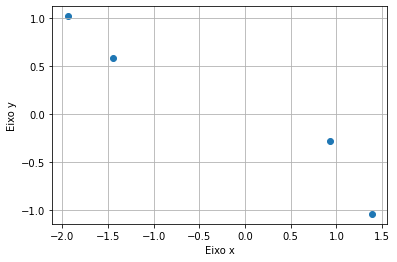

a = -0.5336274
b = -0.0689113


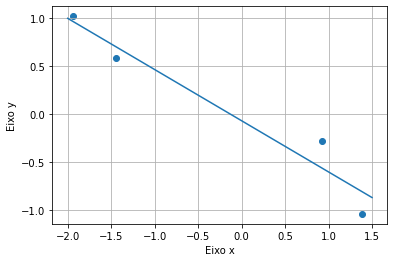

In [ ]:
x = [-1.94, -1.44, 0.93, 1.39]
y = [1.02, 0.59, -0.28, -1.04]
plt.scatter(x,y)
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.grid()
plt.show()
MMQ(4, x, y, -2, 1.5)

In [ ]:
import matplotlib.pyplot as plt
def MMQ(n, x, y, x_in):
  sumx = 0
  sumxy = 0
  st = 0
  sumy = 0
  sumx2 = 0
  sr = 0

  for i in range(0, n):
    sumx = sumx + x[i]
    sumy = sumy + y[i]
    sumxy = sumxy + x[i] * y[i] 
    sumx2 = sumx2 + x[i] * x[i] 
  
  xm = sumx/n
  ym = sumy/n
  al = (n*sumxy - sumx*sumy) / (n*sumx2 - sumx*sumx)
  a0 = ym - al*xm

  for i in range(0, n):
    st = st + (y[i] - ym)**2
    sr = sr + (y[i] - al*x[i] - a0)**2
  
  syx = (sr / (n-2))**0.5
  r2 = (st - sr) / st

  a = al
  b = a0
  a = round(a,7)
  b = round(b,7)
  f = a*x_in + b
  f = round(f,7)
  return f


In [ ]:
x = [-1.94, -1.44, 0.93, 1.39]
y = [1.02, 0.59, -0.28, -1.04]
MMQ(4, x, y, 1.0)

-0.6025387

In [ ]:
x = [-1.94, -1.44, 0.93, 1.39]
y = [1.02, 0.59, -0.28, -1.04]
MMQ(4, x, y, 0.93)

-0.5651848